# Business Problem

### To create a model that will predict the flight fare prices based on given features. This is a regression task since our goal is to predict a continous variable which in this case is flight price.

# Importing The Libraries and DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
data = pd.read_excel("Flight_Fare.xlsx")


# Basic Checks

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


The dataset contains time and date features  which needs to be handled since regular encoding strategies will not work. 

In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


1. The only numeric continuous variable in our dataset is price which is our target variable.
2. All the predictors are categorical variables 
3. Total number of observations are 10,683.
4. 'Route' and 'Total_Stops' have one missing value.


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data[data['Price']==1759]  #Min Price Obs

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759


In [8]:
data[data['Price']==79512] #Max Price Obs

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [9]:
data.describe(include="O")  #to include categorical variables with data type 'object'

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Domain Analysis

The above dataset is about flight prices and certain features that impact it. This dataset is of Indian domestic travelling patterns and the goal is to predict the flight prices based on given features. 

### Airline
- The types of airlines- 'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business','Multiple carriers Premium economy', 'Trujet'.
- Full-service airlines like Vistara, Jet Airways and Air India tend to be more expensive than budget carriers like  Air India Regional, SpiceJet, Air India Express, IndiGo, GoAir, AirAsia India, Trujet.

### Date_of_Journey
- This column will let us know about the date on which the passenger’s journey will start.
- Holiday seasons and other such peak travel times are guaranteed to get lots of bookings and  are priced higher. Seasons known to have very poor load factor are priced cheaper and so on.
-  Flights that take off and land on weekends, or Mondays and Fridays generally cost more since demand for tickets on those days is relatively higher, leading to a subsequent hike in fares. Midweek flights such as flying on a Tuesday or Wednesday are cheaper. This is because airlines typically announce the sales on select routes on a Monday night thus one could bag a cheaper flight the next day. For a domestic route, travelling on a weekday or even a Saturday for travel tends to be cheaper. 

### Source
- This column holds the name of the place from where the passenger’s journey will start.
- The sources are 'Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'

###  Destination
- This column holds the name of the place to where passengers wanted to travel.
- The destinations are 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'
- Fares to smaller cities with little airline competition are typically more expensive than fares to big cities with hub airports catering to many different carriers.

### Route
- Here we can know about that what is the route through which passengers have opted to travel from his/her source to their destination.
- The route determines the distance and time taken to reac the destination. The farther the distance, the more the travel time, the more expensive the flight ticket price is. It is considered to be almost in direct relation with the pricing system of flight tickets.


### Dep_Time
- The departure time is when the passengers flight will leave from source
- The departure time also could have an impact on the fares. Usually, flights scheduled during peak hours between 11am and 8pm are more expensive than the ones for other time slots. Off hours tend to have low passenger traffic, thus offering lower airfare.
-  flying during unpopular times-of-day such as at dawn, during meal times or overnight “red-eye” flights( flight scheduled to depart at night and arrive the next morning) are cheaper.


### Arrival_Time
- Arrival time is when the passenger will reach his/her destination.


### Duration
- Duration is the whole period that a flight will take to complete its journey from source to destination.
- Intuitively, we know that the longer the flight duration i,e. in-flight time, the more the resource consumption such as fuel etc. and consequently the higher the prices.

### Total_Stops
- The total number of places flights will stop in the whole journey.

### Additional_Info
- In this column, we will get information about food, premium features, and other amenities. Opting to chose for an in flight meal or a business class will naturally result in a higher flight price. 

### Price
- Price of the flight for a complete journey including all the expenses before onboarding. This is our target variable which we are trying to predict. 

# Data Preparation

- This preprocessing step involves the manipulation and consolidation of raw data  into a standardized format so that it can be used in a model. This would include feature creation, cleaning data, data augmentation, transformations etc.
- In this case, we need to convert the date and time related columns into a format which can be used for analysis and be understood by the model. 
- We would also need to clean data of other columns if required

## Date

The 'Date_of_Journey' column can be used to create new columns such as day of the week and month.

In [10]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13492\3109116361.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


We have converted the date column to a pandas datetime object

In [12]:
data["Weekday_of_Journey"] = data["Date_of_Journey"].dt.weekday
data["Month_of_Journey"] = data["Date_of_Journey"].dt.month
data["Day_of_Journey"]= data["Date_of_Journey"].dt.day
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,3


In [13]:
# We can now drop the Date_of_Journey column since all the necessary features has been extracted from it
data.drop("Date_of_Journey", axis=1, inplace=True)

## Time

- The time columns that need to be handled are Dep_Time, Arrival_Time &	Duration
- An airport typically sees four ‘peaks’ in a day. These are approximately between 6 a.m.-8.30 a.m., 10.30 a.m.-noon, 4 p.m.-6 p.m. and 7 p.m.-9.30 p.m. Flight prices tend to be higher during peak hours.

Converting the arrival and departeure time to hours

In [14]:
data["Dep_Time"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7h 25m,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19h,2 stops,No info,13882,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5h 25m,1 stop,No info,6218,3,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21,4h 45m,1 stop,No info,13302,3,1,3


In [15]:
# Code to convert duration column's time to hours
duration=[]
for value in data.Duration:
    if "h" in value and "m" in value:     #hour and minutes
        dur_splitted = value.split(" ")
        time = []
        for i in dur_splitted:
            stripped_value = i.rstrip(i[-1]) #to remove the last charachter of string eg: 2h -> 2
            time.append(stripped_value)
        hour =int(time[0])   #first value is hour when duration has "h"&"m"
        minutes = int(time[1]) #second value is minute
        total_time = round(hour + (minutes/60), 2)  #calculating total time in hours
        duration.append(total_time)
    elif "h" in value:    #hour only                
        stripped_value = value.rstrip(value[-1])  
        total_time = int(stripped_value)
        duration.append(total_time)
        
    else:          #minutes only
        stripped_value = value.rstrip(value[-1])
        total_time = round((int(stripped_value)/60),2) # converting minutes to hour
        duration.append(total_time)
        

data.Duration = duration
data.head()      

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2.83,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.42,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.00,2 stops,No info,13882,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.42,1 stop,No info,6218,3,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.75,1 stop,No info,13302,3,1,3


### Airlines


The airlines column contains values that need to be cleaned. Eg: 'Vistara Premium economy' is not another airline and would actuallycome under 'Vistara' while 'Premium economy' part of it is just additional information about the seat type. By doing this we will eliminate creation of extra dimensions during the categoraical data conversion step. 

In [16]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
# Cleaning the Airline column and adding the new data such as premium economy etc to the "Additional_Info" column

data.loc[data["Airline"]== 'Vistara Premium economy', "Airline"]='Vistara'
data.loc[data["Airline"]== 'Jet Airways Business', "Airline"]='Jet Airways'
data.loc[data["Airline"]== 'Multiple carriers Premium economy', "Airline"]='Multiple carriers'

data.loc[data["Airline"]== 'Vistara Premium economy', "Additional_Info"]= "Premium economy"
data.loc[data["Airline"]== 'Jet Airways Business', "Additional_Info"]= "Business class"
data.loc[data["Airline"]== 'Multiple carriers Premium economy', "Additional_Info"]= "Premium economy"



In [18]:
data.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

### Additional_Info
Cleaning this column, we could maybe drop this column if model performance is poor

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2.83,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.42,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.00,2 stops,No info,13882,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.42,1 stop,No info,6218,3,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.75,1 stop,No info,13302,3,1,3


In [20]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [21]:
data.loc[data["Additional_Info"]== '1 Long layover', "Additional_Info"]= "Layover"
data.loc[data["Additional_Info"]=='1 Short layover', "Additional_Info"]= "Layover"
data.loc[data["Additional_Info"]=='2 Long layover', "Additional_Info"]= "Layover"

Changing "No Info" to "No info since capital letter I unecessarily creates separate label

In [22]:
data.loc[data["Additional_Info"]=='No Info', "Additional_Info"]="No info"

As there is only one red eye flight we could put it under No info label which would also prevent creation of an extra dimension.

In [23]:
data.loc[data["Additional_Info"]=='Red-eye flight', "Additional_Info"]="No info"


In [24]:
data.Additional_Info.value_counts()

No info                         8349
In-flight meal not included     1982
No check-in baggage included     320
Layover                           21
Change airports                    7
Business class                     4
Name: Additional_Info, dtype: int64

### Destination
- Since Delhi and New Delhi have  the same commercial airport- Indira Gandhi International Airport we can put New Delhi Destination the same as Delhi to avoid creation of different labels. 

In [25]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
data.loc[data["Destination"]=="New Delhi", "Destination"]= "Delhi"

# EDA

## Univariate Analysis

In [27]:
# import sweetviz as sv

In [28]:
# report = sv.analyze(data)
# report.show_html()

#### Airline
- The top 3 airlines with the highest frequency are Jet Airways(36%), IndiGo(19%) and Air India(16%)


<Axes: title={'center': 'Airline'}>

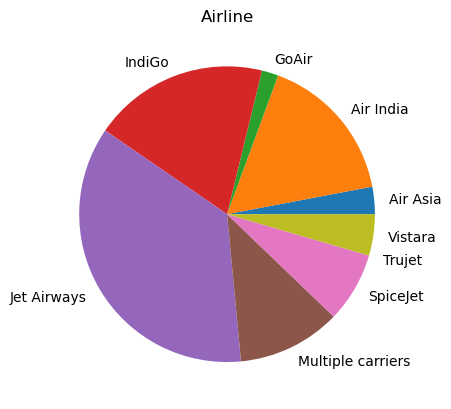

In [29]:
data.groupby("Airline").size().plot(kind="pie", title="Airline", ylabel="")


#### Source
- The source location for most flights is Delhi(42%) followed by Kolata(27%), Bangalore(21%), Mumbai(7%) and Chennai(4%).

<Axes: title={'center': 'Source'}>

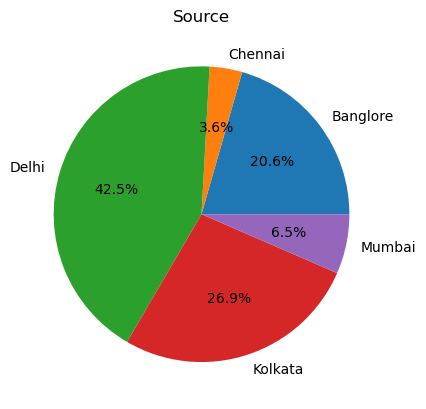

In [30]:
data.groupby("Source").size().plot(kind="pie", title="Source", ylabel="", autopct='%1.1f%%')

###### Destination
- The top 3 destinations are Cochin(42%), Bangalore(27%) and Delhi(20.6%).

<Axes: title={'center': 'Destination'}>

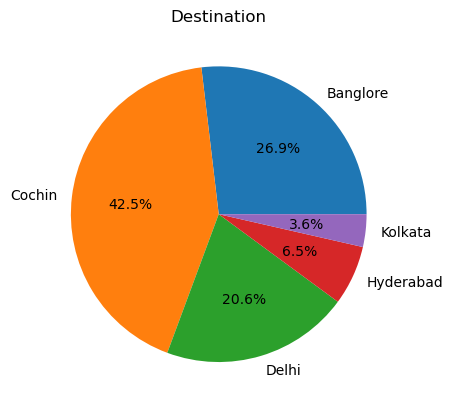

In [31]:
data.groupby("Destination").size().plot(kind="pie", title="Destination", ylabel="", autopct='%1.1f%%')

#### Dep_Time
- It is a bimodal distribution with 2 peaks, one in the morning(6:00 - 9:00) and the other in the evening(17:00 - 20:00).
- Most flights seem to take-off between 9:00 to 10:00 A.M.
- Flight departures are least from 12:00 to 3:00 A.M.

<Axes: xlabel='Dep_Time', ylabel='count'>

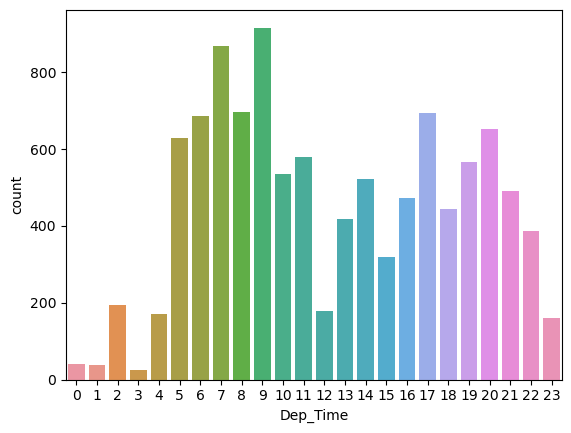

In [32]:
#Using a countplot to see number of observations in each hour
sns.countplot(data= data, x="Dep_Time")

#### Arrival_Time
- This distribution seems to have 3 peaks at 4:00, 12:00 and 19:00
- Most flights seem to land at 19:00 
- The time between 12:00 to 6:00 A.M has the least number of arrivals except the time from 4:00-5:00 A.M. This spike could be indicative of red-eye flights which tend to arrive during the early morning hours and are priced cheaper. 

<Axes: xlabel='Arrival_Time', ylabel='count'>

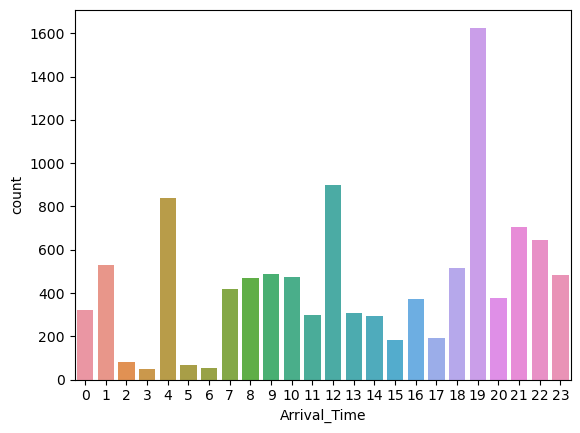

In [33]:
sns.countplot(data= data, x="Arrival_Time")

#### Duration
- Most flight durations are under 3 hours
- The maximum flight duration is 47.67 hours 
- The least value is 0.08 hours which is clearly not possible. This wrongly documented value needs to be handled.

<Axes: xlabel='Duration', ylabel='Count'>

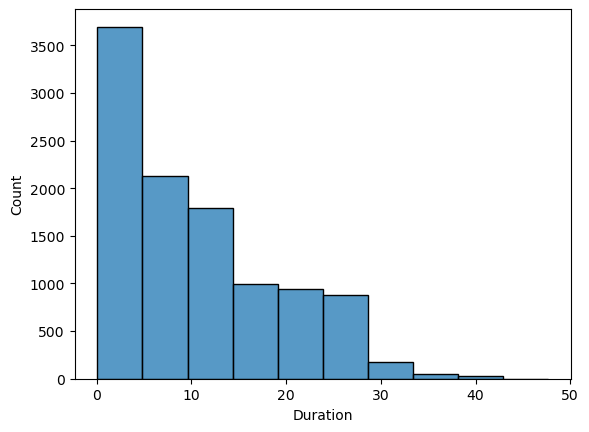

In [34]:
sns.histplot(data.Duration, bins = 10)

#### Total_Stops
- Almost half the flights(53%) have 1- stop followed by non-stop(33%) and 2-stops(14%)


<Axes: xlabel='Total_Stops', ylabel='count'>

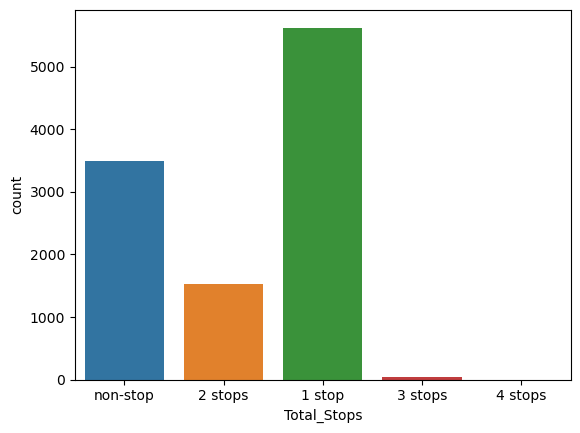

In [35]:
sns.countplot(data=data, x="Total_Stops")

#### Additional_Info
- This feature doesn't seem to provide much information since 78% obs are "No info"

#### Weekday_ of_Journey
- The most frequently travelled day is Thursday(21%), followed by Friday(17%) and Wednesday(15%)
- Sunday is the least frequently travelled day
- This feature doesnt show much variation 


<Axes: xlabel='Weekday_of_Journey', ylabel='count'>

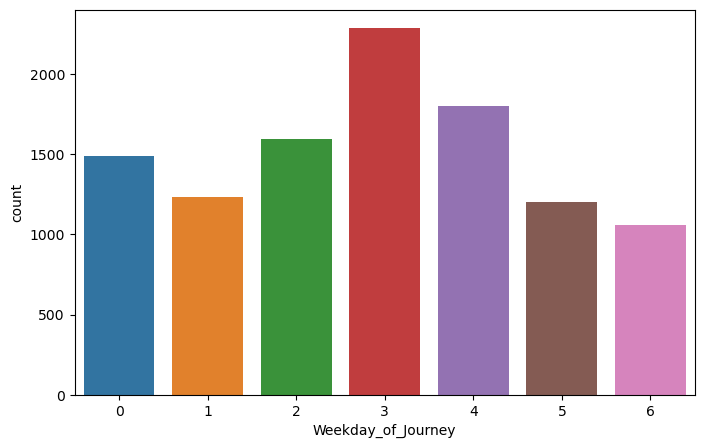

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x=data.Weekday_of_Journey)

#### Month_of_Journey
- The most frequently travelled months are June(24%), March(21%) & May(19%) 
- April is the least travelled month with 4% observations

<Axes: xlabel='Month_of_Journey', ylabel='count'>

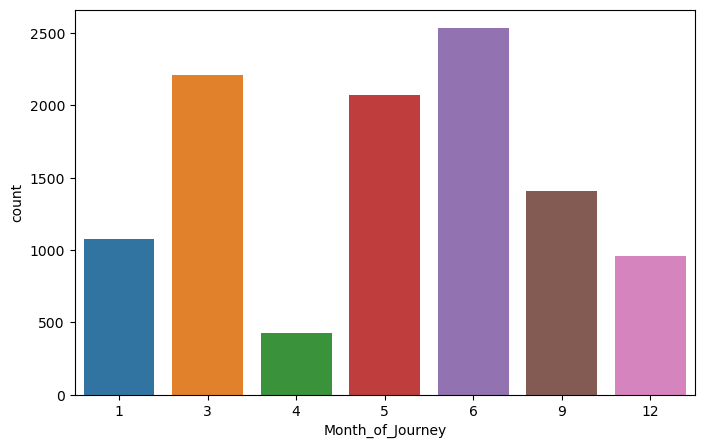

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x=data.Month_of_Journey)

#### Day_of_Journey
- The 6th day of the month seems to be the most popular day for travel
- The feature doesnt contain observations for all the days of the month and has only 9 unique values


<Axes: xlabel='Day_of_Journey', ylabel='count'>

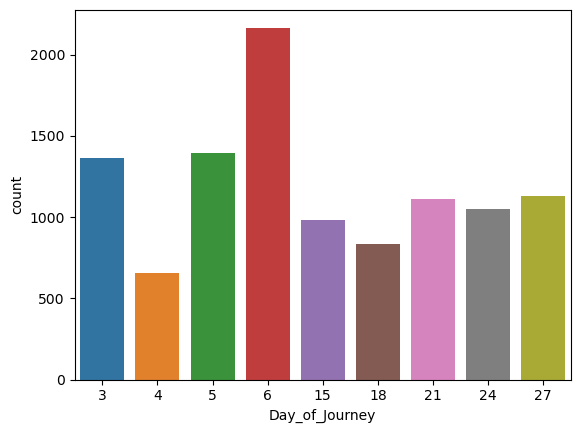

In [38]:
sns.countplot(data=data, x=data.Day_of_Journey)

## Bivariate Analysis

In [39]:


# from autoviz.AutoViz_Class import AutoViz_Class

# AV = AutoViz_Class()

# report = AV.AutoViz('', depVar="Price",dfte=data,header=0,verbose=1,lowess=False,chart_format="html",save_plot_dir=None)
   

In [40]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22,1,2.83,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.42,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.00,2 stops,No info,13882,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.42,1 stop,No info,6218,3,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16,21,4.75,1 stop,No info,13302,3,1,3


### Airline vs Price

<Axes: xlabel='Airline', ylabel='Price'>

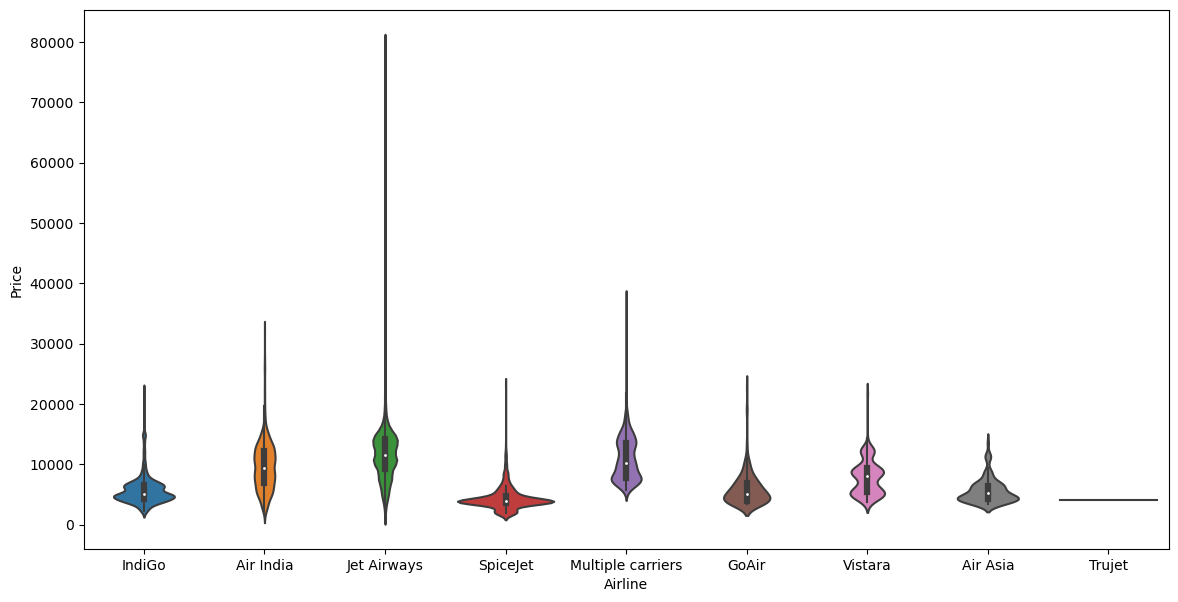

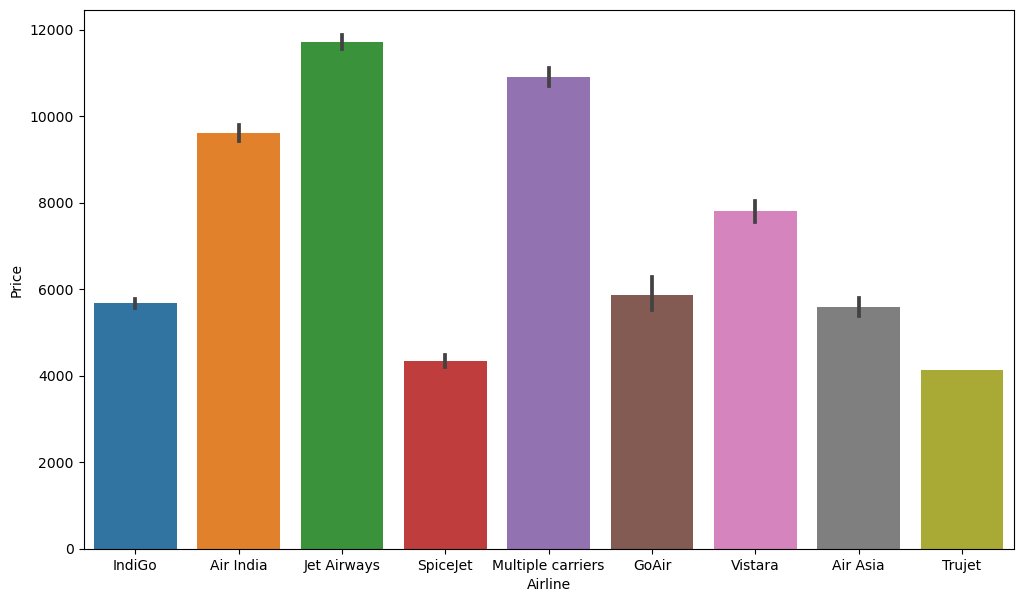

In [41]:
plt.figure(figsize=(14,7))
sns.violinplot(x="Airline", y="Price", data=data)

plt.figure(figsize=(12,7))
sns.barplot(x="Airline", y="Price", data=data)

- Jet Airways is the airline with the highest prices and has extreme values that go upto 80,000. The violin plot shows most of its values are distributed in the higer price range as compared to other airlines.
- Indigo, SpiceJet, GoAir and AirAsia are the more economically priced airlines with most of the observations distributed in the lower ranges- mostly below 10,000. The violin plot of SpiceJet shows a sharp peak indicating most of its observations are distributed around the 5000 rupuees mark.
- AirIndia, Multiple carriers and Vistara seem to have more premium prices. Vistara's violin plot shows 3 peaks and seems to cater to economical as well as premium and business class prices.

### Source vs Price

<Axes: xlabel='Source', ylabel='Price'>

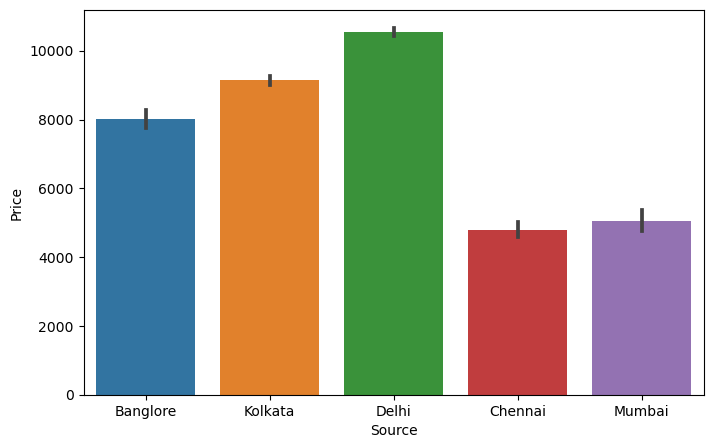

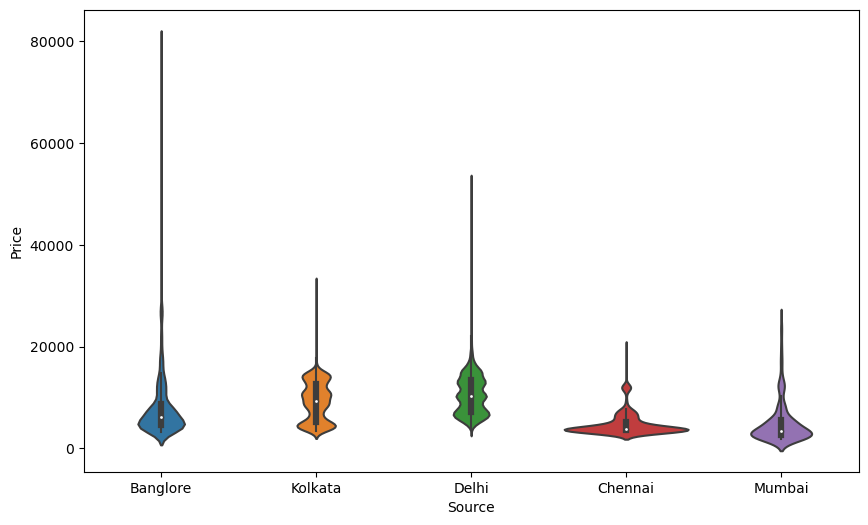

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x="Source", y="Price", data=data)

plt.figure(figsize=(10,6))
sns.violinplot(x="Source", y="Price", data=data)

- Flights leaving from Delhi have higher prices as compared to other places.
- Most flights leaving from Chennai, Mumbai and Bamgalore are cheaper and fall near the 5000 rupees mark. 
- The violin plots of Kolkata and Delhi show 3 peaks- with similar frequency peaks of obs in lower, medium and high price ranges.  

### Destination vs Price

<Axes: xlabel='Destination', ylabel='Price'>

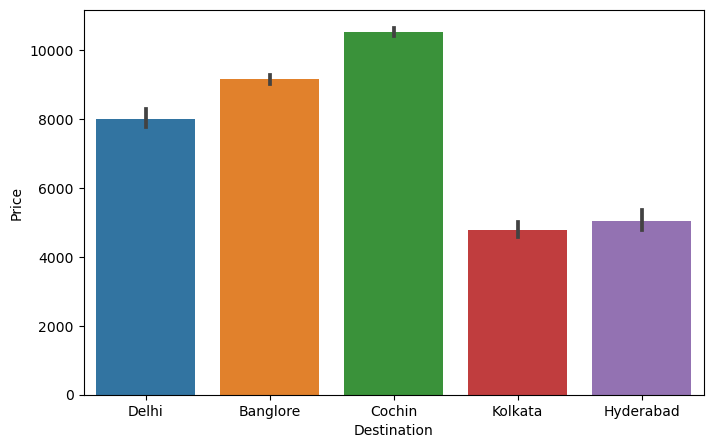

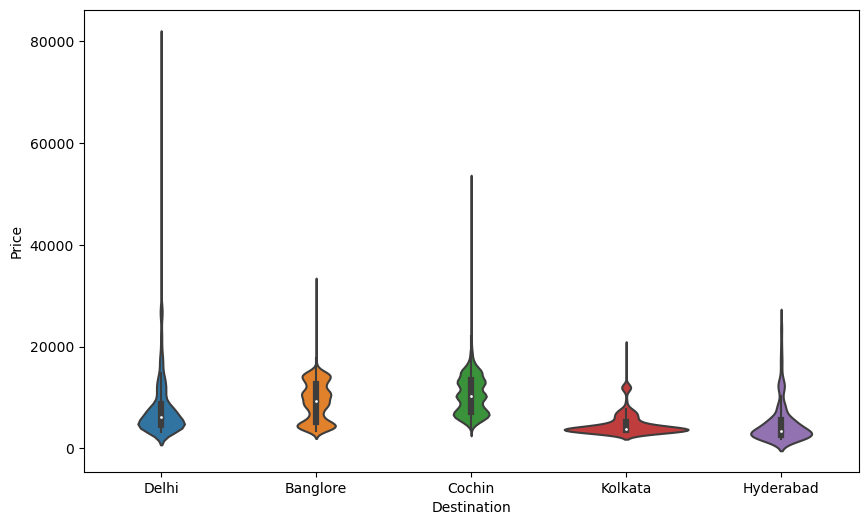

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x="Destination", y="Price", data=data) #Barplots uses average as plotting criteria 

plt.figure(figsize=(10,6))
sns.violinplot(x="Destination", y="Price", data=data)

- Flights landing at Cochin are more expensive than other destinations
- Flights with destinations as Delhi, Kolkata and Hyderabad have most observations in the lower price range at around the 5000 ruppes mark. Delhi has some extreme high price values.
- Cochin and Bangalore show 3 peaks in the violin plot with its observations peaking in the low, mid and high price range.

### Dep_Time vs Price

<Axes: xlabel='Dep_Time', ylabel='Price'>

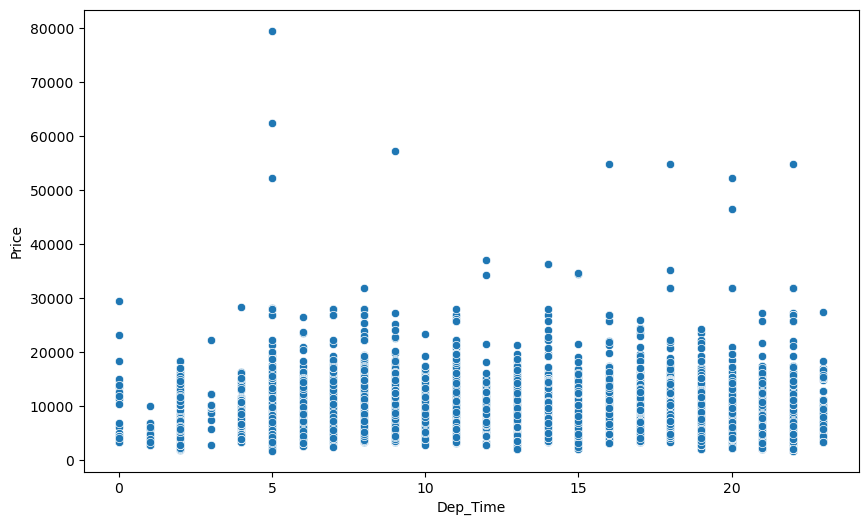

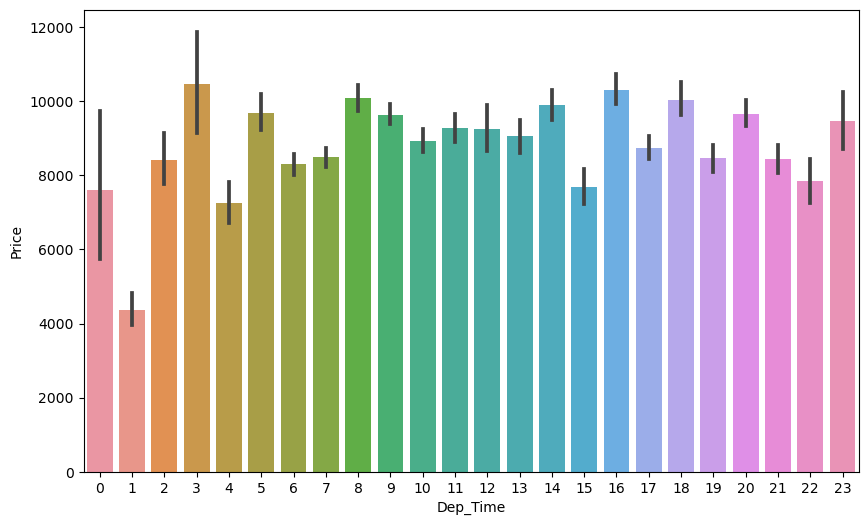

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Dep_Time", y="Price", data=data)

plt.figure(figsize=(10,6))
sns.barplot(x="Dep_Time", y="Price", data=data)


- Prices are higher for flights departing from 5:00 a.m to 9:00 a.m, 11:00 a.m, 2:00 p.m, 5:00 to 6:00 p.m, thus flights departing in the mid morning and evening hours tend to have higher prices.
- Flights deprating before 4:00 a.m have relatively lower prices.
- The prices don't seem to drastically fluctuate with most values lying below 10,000.

<Axes: xlabel='Arrival_Time', ylabel='Price'>

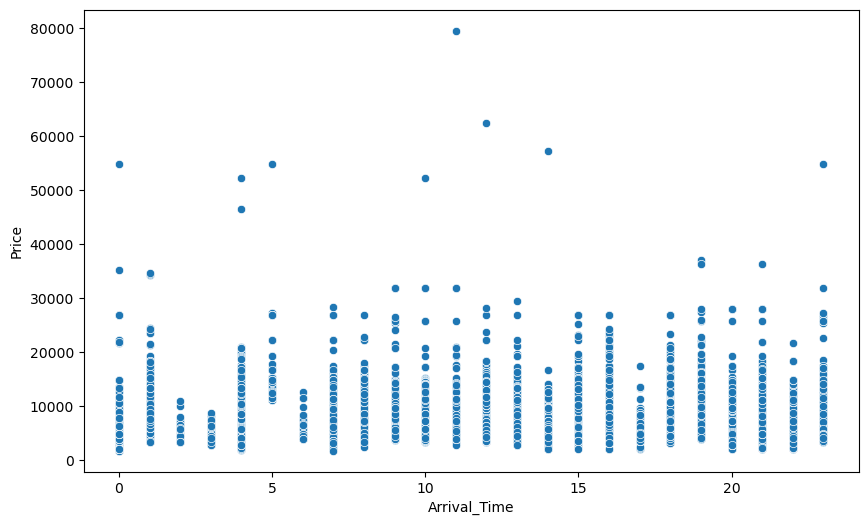

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Arrival_Time", y="Price", data=data)

- Flights arriving in the mornng and evening hours have higher prices

### Duration vs Price

<Axes: xlabel='Duration', ylabel='Price'>

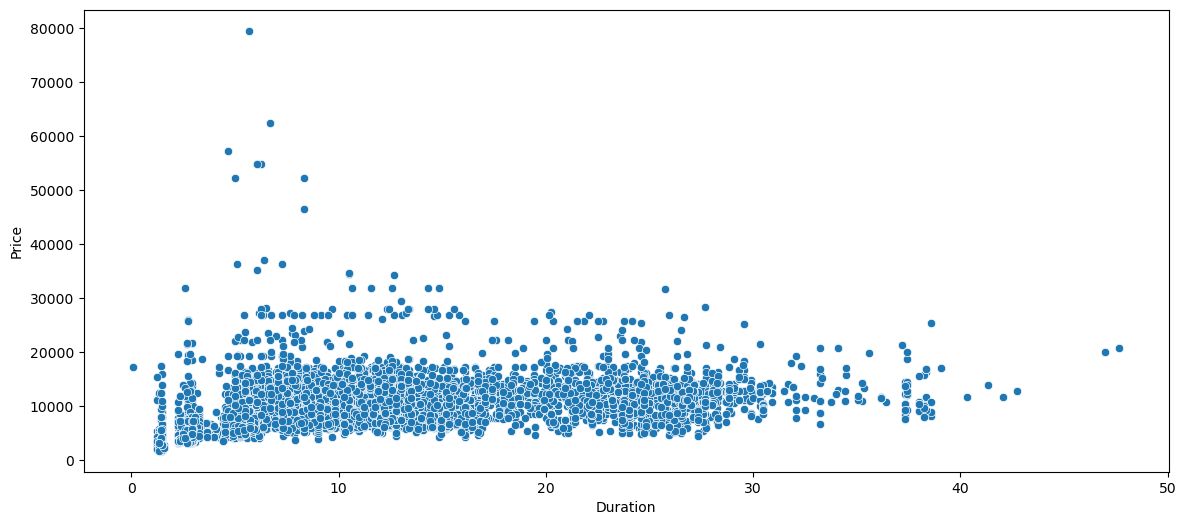

In [46]:
plt.figure(figsize=(14,6))
sns.scatterplot(x="Duration", y="Price", data=data)


- Flight prices show a slight increase with duration

### Total_Stops vs Price

<Axes: xlabel='Total_Stops', ylabel='Price'>

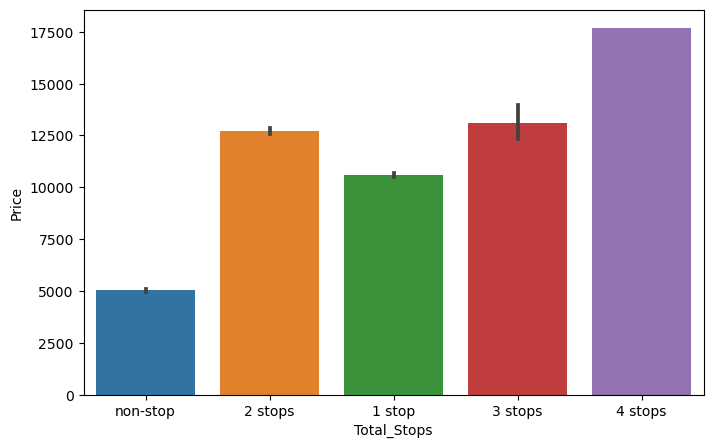

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x="Total_Stops", y="Price", data=data) 

- We can infer from the plot that in general, the more the number of stops the greater the flight fare prices.


### Additional_Info vs Price

<Axes: xlabel='Additional_Info', ylabel='Price'>

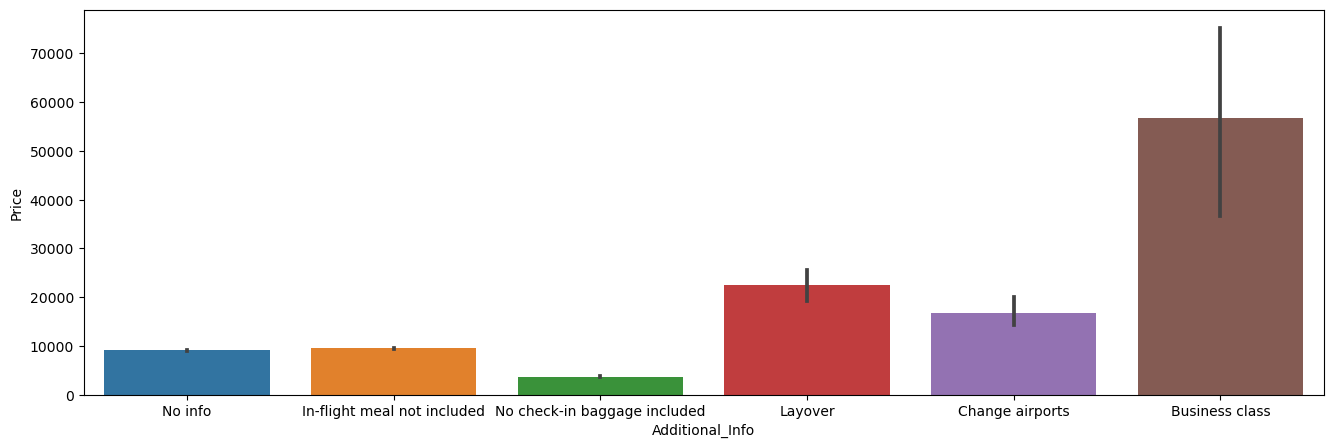

In [48]:
plt.figure(figsize=(16,5))
sns.barplot(x="Additional_Info", y="Price", data=data) 



- Flights with a business class type seat have significantly higher prices
- Flights with layover and airport changes have high prices as well

### Weekday_of_Journey vs Price


<Axes: xlabel='Weekday_of_Journey', ylabel='Price'>

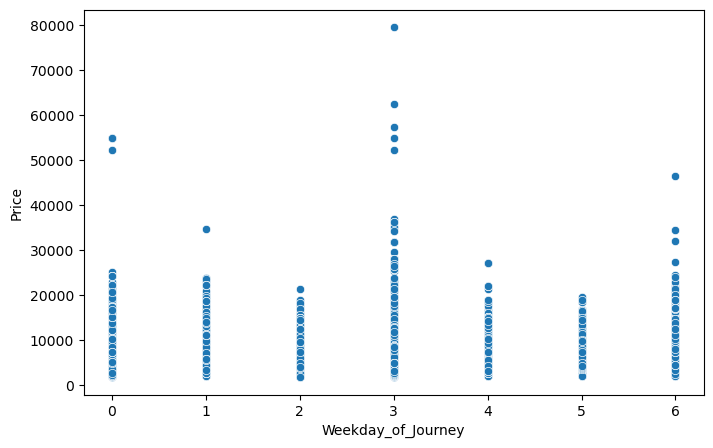

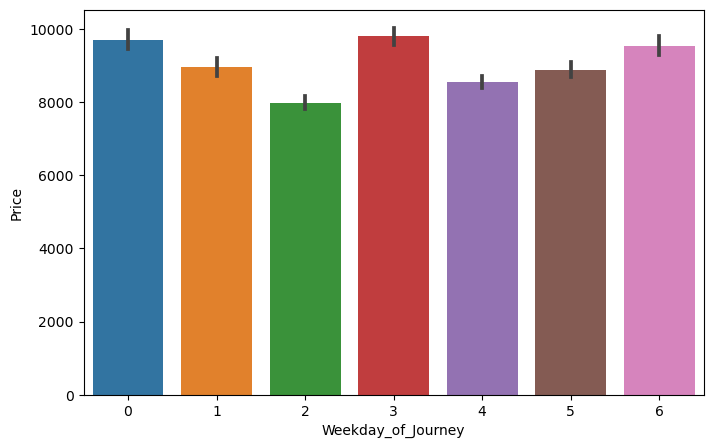

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Weekday_of_Journey", y="Price", data=data) 

plt.figure(figsize=(8,5))
sns.barplot(x="Weekday_of_Journey", y="Price", data=data) 

- Flights scheduled for Thursday seem to have higher prices
- Saturday, Friday  and Wednesday seem to have lower fares as compared to other weekdays
- Prices dont seem to fluctuate much based on day of the week

### Month_of_Journey vs Price

<Axes: xlabel='Month_of_Journey', ylabel='Price'>

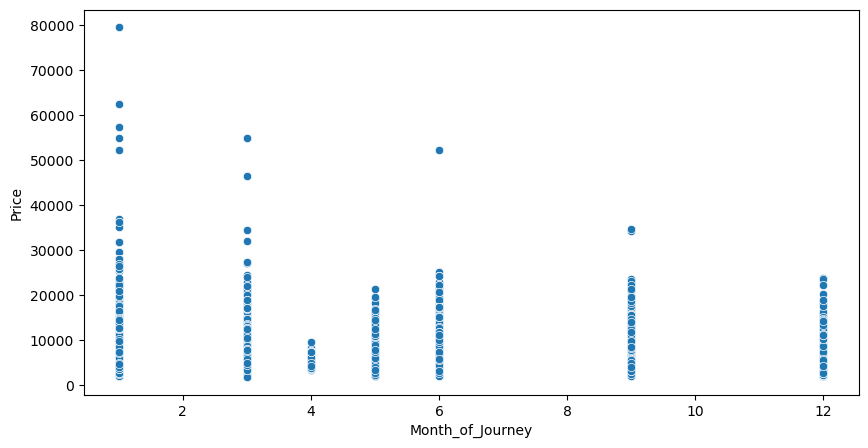

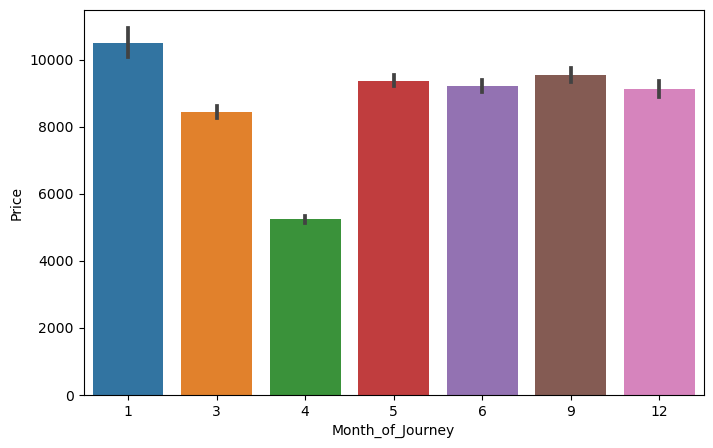

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Month_of_Journey", y="Price", data=data)

plt.figure(figsize=(8,5))
sns.barplot(x="Month_of_Journey", y="Price", data=data) 

- Fares are highest during the month of January
- Except April, which has the lowest prices, all the months seem to hace a similar price range without any major fluctuations.

### Day_of_Journey vs Price



<Axes: xlabel='Day_of_Journey', ylabel='Price'>

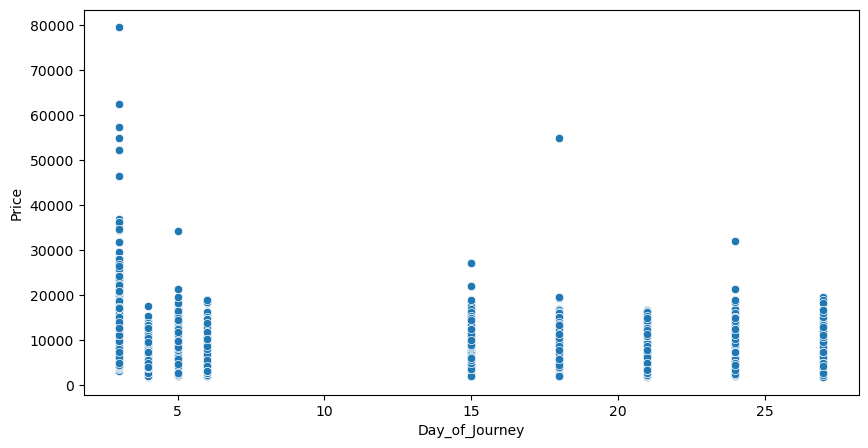

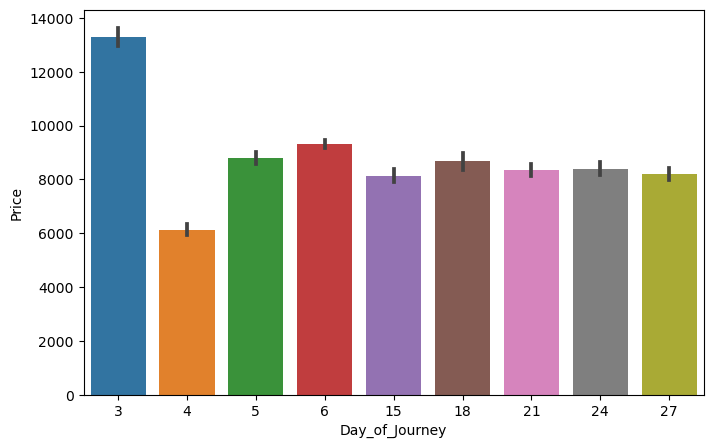

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Day_of_Journey", y="Price", data=data)

plt.figure(figsize=(8,5))
sns.barplot(x="Day_of_Journey", y="Price", data=data) 

- Prices during first few days of the month are higher as compared to days at the end of the month

# Data Preprocessing

## Missing values

In [ ]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price                 0
Weekday_of_Journey    0
Month_of_Journey      0
Day_of_Journey        0
dtype: int64

In [ ]:
# Since there is only one missing value we can drop the row

data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Weekday_of_Journey    0
Month_of_Journey      0
Day_of_Journey        0
dtype: int64

## Outliers

In [ ]:
# Since duration has an impossible and extreme value of flight duration = 0.08 we remove this obs
data.drop(data.loc[(data.Duration<=0.1)].index, axis=0, inplace=True)

Tree based algorithms are robust to outliers

## Handling Categorical Data

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22,1,2.83,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.42,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.00,2 stops,No info,13882,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.42,1 stop,No info,6218,3,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16,21,4.75,1 stop,No info,13302,3,1,3


### Frequency encoding for Airline, Route and Additional_Info

In [ ]:
airline_freq = round(data.groupby("Airline").size()/len(data),2)

In [ ]:
data.groupby("Airline").size()

Airline
Air Asia              319
Air India            1750
GoAir                 194
IndiGo               2053
Jet Airways          3855
Multiple carriers    1209
SpiceJet              818
Trujet                  1
Vistara               482
dtype: int64

In [ ]:
airline_freq

Airline
Air Asia             0.03
Air India            0.16
GoAir                0.02
IndiGo               0.19
Jet Airways          0.36
Multiple carriers    0.11
SpiceJet             0.08
Trujet               0.00
Vistara              0.05
dtype: float64

In [ ]:
data.Airline = data.Airline.map(airline_freq)


In [ ]:
additional_freq = round(data.groupby("Additional_Info").size()/len(data),2)
data.Additional_Info = data.Additional_Info.map(additional_freq)
additional_freq

Additional_Info
Business class                  0.00
Change airports                 0.00
In-flight meal not included     0.19
Layover                         0.00
No check-in baggage included    0.03
No info                         0.78
dtype: float64

In [ ]:
pd.options.display.max_rows = 4000
data.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

Since Route column has very high cardinality (128 unique labels) we can consider the top 9 labels (routes) and group the remaining under 'Other' and then apply frequency encoding. The top 9 labels contain almost 80% of the observations.

In [ ]:
# Code to covert routes other than the top 9 freqently travelled routes to "Others"
route_list=data.Route.tolist()
top_routes= ["DEL → BOM → COK","BLR → DEL","CCU → BOM → BLR","CCU → BLR","BOM → HYD","CCU → DEL → BLR","BLR → BOM → DEL","MAA → CCU","DEL → HYD → COK"] 


for route in route_list:
    if route not in top_routes:
        data.loc[data.Route==route, "Route"]="Other"

data.Route.value_counts()
    


Other              2755
DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
Name: Route, dtype: int64

In [ ]:
routes = round(data.groupby("Route").size()/len(data),2)
data.Route = data.Route.map(routes)

### One Hot Encoding for Source & Destination

In [ ]:
data = pd.get_dummies(data,columns = ["Source", "Destination"], prefix= ["Source", "Destination"],drop_first=True)
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.19,0.15,22,1,2.83,non-stop,0.78,3897,6,3,24,0,0,0,0,0,1,0,0
1,0.16,0.26,5,13,7.42,2 stops,0.78,7662,5,1,5,0,0,1,0,0,0,0,0
2,0.36,0.26,9,4,19.00,2 stops,0.78,13882,4,9,6,0,1,0,0,1,0,0,0
3,0.19,0.26,18,23,5.42,1 stop,0.78,6218,3,12,5,0,0,1,0,0,0,0,0
4,0.19,0.26,16,21,4.75,1 stop,0.78,13302,3,1,3,0,0,0,0,0,1,0,0


### Manual Encoding for Total_Stops


In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
data.Total_Stops = data.Total_Stops.map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.19,0.15,22,1,2.83,0,0.78,3897,6,3,24,0,0,0,0,0,1,0,0
1,0.16,0.26,5,13,7.42,2,0.78,7662,5,1,5,0,0,1,0,0,0,0,0
2,0.36,0.26,9,4,19.00,2,0.78,13882,4,9,6,0,1,0,0,1,0,0,0
3,0.19,0.26,18,23,5.42,1,0.78,6218,3,12,5,0,0,1,0,0,0,0,0
4,0.19,0.26,16,21,4.75,1,0.78,13302,3,1,3,0,0,0,0,0,1,0,0


## Feature Selection

<AxesSubplot:>

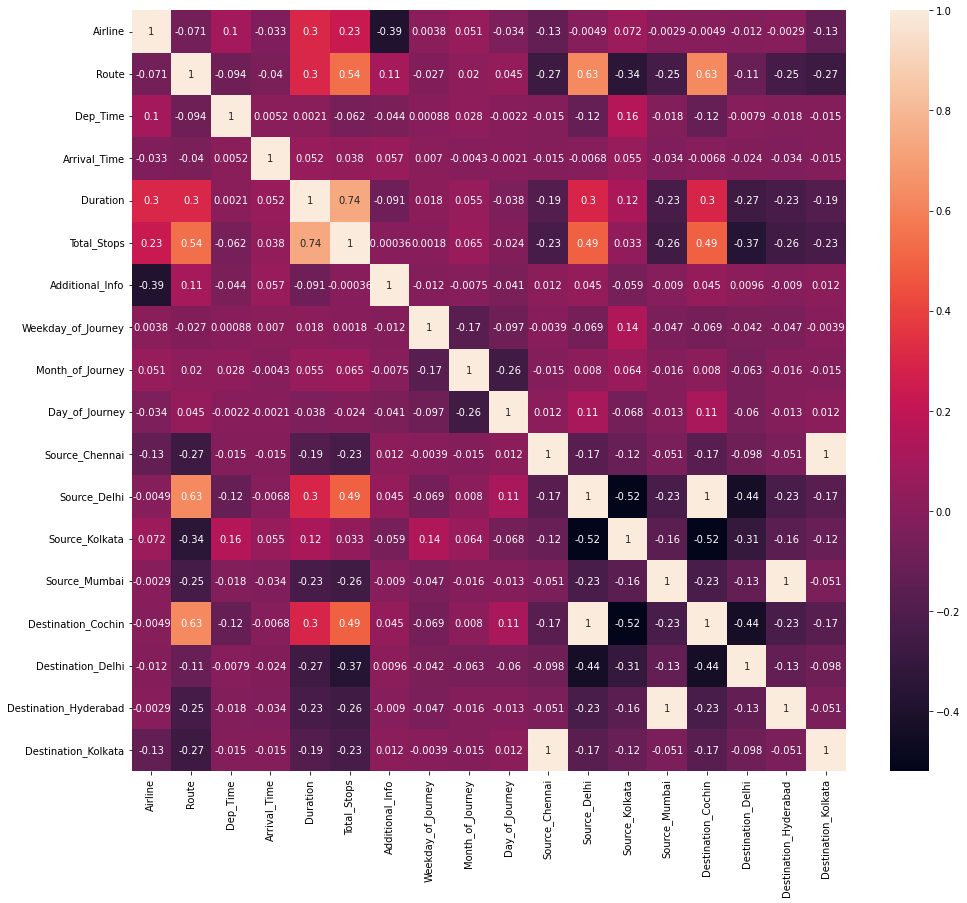

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data.drop("Price", axis=1).corr(), annot=True)

There are no highly correlated, constant or unique value features.

In [ ]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Month_of_Journey,Day_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.19,0.15,22,1,2.83,0,0.78,3897,6,3,24,0,0,0,0,0,1,0,0
1,0.16,0.26,5,13,7.42,2,0.78,7662,5,1,5,0,0,1,0,0,0,0,0
2,0.36,0.26,9,4,19.00,2,0.78,13882,4,9,6,0,1,0,0,1,0,0,0
3,0.19,0.26,18,23,5.42,1,0.78,6218,3,12,5,0,0,1,0,0,0,0,0
4,0.19,0.26,16,21,4.75,1,0.78,13302,3,1,3,0,0,0,0,0,1,0,0


## The model doesn't need Feature Scaling

# Model Creation

## Splitting the Dataset

In [ ]:
X = data.drop("Price", axis= 1)
y=data.Price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test,y_pred, squared=False)
rmse

1482.924729549502

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

666.3981138685351

In [ ]:
predictions = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
predictions

In [ ]:
N=len(data)
len(data.columns)


19

In [ ]:
r2= r2_score(y_test,y_pred)
adjusted_r2= 1 - (1-r2)*(N-1)/(N-19-1)
print(f"r2: {r2}\nadjusted_r2: {adjusted_r2}")

r2: 0.8935238585779252
adjusted_r2: 0.8933340971402534


In [ ]:

y_train_pred= model.predict(X_train)
r2_train= r2_score(y_train,y_train_pred)
adjusted_r2_train= 1 - (1-r2_train)*(N-1)/(N-19-1)
print(f"r2_train: {r2_train}\nadjusted_r2_train: {adjusted_r2_train}")

r2_train: 0.9762406631684963
adjusted_r2_train: 0.9761983193546141


- The root mean squred error value for our model is ~1503 and mae is 670. Our aim is to minimize these value. The lower the rmse and mae the better the model.
-There is an insignificant difference between r2 and adjusted r2score.
- The r2 score for the training data is 0.97 which is indicative of an overfitted model.
-The r2 score for the test data is 0.89 which is a good score.

In [ ]:
from sklearn.model_selection import cross_val_score

RF_crossval_score = cross_val_score(model,X,y,cv=10,scoring='r2')
print(RF_crossval_score)
print("Cross validation Score:",RF_crossval_score.mean())
print("Std :",RF_crossval_score.std())
#std of < 0.05 is good. 

[0.86522375 0.87647759 0.85631534 0.88560489 0.92011816 0.859721
 0.88917034 0.92014604 0.89661445 0.75050173]
Cross validation Score: 0.871989329337025
Std : 0.04576435289182067


#### The cross-validation score using 10 folds obtained for the Random Forest model is 0.87 with a std of 0.04

## Model Selection

After applying 3 different models (notebook containing detailed model building present in folder) to the dataset we have the following average cross validation scores-
- KNN Regressor- 0.57
- Linear Regression - 0.51
- Random Forest - 0.87


Clearly Random Forest performs the best so we will move on to hyperparameter tuning for this model.

## Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# params={'n_estimators': list(range(100,1000,200)), 
#         'criterion':['squared_error'],
#         'max_depth': list(range(5,21,5)), 
#         'min_samples_split': list(range(3,21,5)),
#         'min_samples_leaf': list(range(3,21,5)), 
#         'bootstrap': [True, False]   
# }

# RF_cv = RandomizedSearchCV(model,params, n_jobs=-1, verbose=1, scoring="r2",cv=3)
# RF_cv.fit(X,y)
# print(f"Best Params: {RF_cv.best_params_}\nBest Estimator: {RF_cv.best_estimator_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'squared_error', 'bootstrap': True}
Best Estimator: RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=18,
                      n_estimators=300)


In [ ]:
model_2 = RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=18,
                      n_estimators=300)
model_2.fit(X_train,y_train)
y_pred= model_2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test,y_pred, squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Root Mean Squared error: {rmse}\nMean Absolute Error: {mae}")

Root Mean Squared error: 1603.1249634398478
Mean Absolute Error: 791.0476647967561


In [ ]:
r2= r2_score(y_test,y_pred)
adjusted_r2= 1 - (1-r2)*(N-1)/(N-19-1)
print(f"r2: {r2}\nadjusted_r2: {adjusted_r2}")

r2: 0.8755631975338363
adjusted_r2: 0.8753414266636687


In [ ]:

y_train_pred= model_2.predict(X_train)
r2_train= r2_score(y_train,y_train_pred)
adjusted_r2_train= 1 - (1-r2_train)*(N-1)/(N-19-1)
print(f"r2_train: {r2_train}\nadjusted_r2_train: {adjusted_r2_train}")

r2_train: 0.8994371074753023
adjusted_r2_train: 0.8992578846108459


In [ ]:
from sklearn.model_selection import cross_val_score

RF_crossval_score = cross_val_score(model_2,X,y,cv=10,scoring='r2')
print(RF_crossval_score)
print("Cross validation Score:",RF_crossval_score.mean())
print("Std :",RF_crossval_score.std())
#std of < 0.05 is good. 

[0.87818374 0.86021051 0.80847113 0.8938831  0.91213327 0.8697477
 0.86912941 0.88764341 0.89730703 0.76420424]
Cross validation Score: 0.8640913545791982
Std : 0.04265633760539243


#### Model 2 Performance: Best Estimator: RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=18,n_estimators=300)
   - Root Mean Squared error: 1606.77
   - Mean Absolute Error: 789.61
   - Testing r2: 0.874
   - r2_train: 0.89
   - 10 fold Cross validation Score: 0.86 with std 0.04



In [ ]:
# from sklearn.model_selection import GridSearchCV

# params={'n_estimators': list(range(100,800,100)), 
#         'criterion':['squared_error'],
#         'max_depth': list(range(8,12)), 
#         'min_samples_split': list(range(6,12,2)),
#         'min_samples_leaf': list(range(6,12,2)), 
#         'bootstrap': [True]   
# }

# RF_cv_2 = GridSearchCV(model,params, n_jobs=-1, verbose=1, scoring="r2",cv=3)
# RF_cv_2.fit(X,y)
# print(f"Best Params: {RF_cv_2.best_params_}\nBest Estimator: {RF_cv_2.best_estimator_}")

Fitting 3 folds for each of 252 candidates, totalling 756 fits
Best Params: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 400}
Best Estimator: RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=400)


In [ ]:
model_3 = RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=400)
model_3.fit(X_train,y_train)
y_pred= model_3.predict(X_test)

rmse = mean_squared_error(y_test,y_pred, squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Root Mean Squared error: {rmse}\nMean Absolute Error: {mae}")

r2= r2_score(y_test,y_pred)
adjusted_r2= 1 - (1-r2)*(N-1)/(N-19-1)
print(f"r2: {r2}\nadjusted_r2: {adjusted_r2}")

y_train_pred= model_3.predict(X_train)
r2_train= r2_score(y_train,y_train_pred)
adjusted_r2_train= 1 - (1-r2_train)*(N-1)/(N-19-1)
print(f"r2_train: {r2_train}\nadjusted_r2_train: {adjusted_r2_train}")

from sklearn.model_selection import cross_val_score

RF_crossval_score = cross_val_score(model_3,X,y,cv=10,scoring='r2')
print(RF_crossval_score)
print("Cross validation Score:",RF_crossval_score.mean())
print("Std :",RF_crossval_score.std())
#std of < 0.05 is good. 

Root Mean Squared error: 1706.0990571055913
Mean Absolute Error: 886.2692380517365
r2: 0.8590637943430341
adjusted_r2: 0.8588126182894292
r2_train: 0.8742749764208597
adjusted_r2_train: 0.8740509096871572
[0.84998669 0.83828962 0.79482634 0.87446205 0.89865649 0.85718318
 0.85882629 0.86714627 0.88041301 0.75488972]
Cross validation Score: 0.84746796629122
Std : 0.04059237917021331


#### Model 3 Performance: Best Estimator: RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=8, n_estimators=400)
   - Root Mean Squared error: 1704.85
   - Mean Absolute Error: 888.025
   - Testing r2: 0.86
   - r2_train: 0.87
   - 10 fold Cross validation Score: 0.847 with std 0.04

### Conclusion
After performing hyperparameter tuning we have the following summary of scores of the 3 RF models-

#### Cross Val Scores
  - Model 1: 0.89 (No hyperparameter tuning)
  - Model 2: 0.86 (Hyperparameter tuning using RandomizedSearchCV)
  - Model 3: 0.84 (Hyperparameter tuning using GridSearchCV)
  
Since we aim to create a generalized model, we will not select model 1 since the training r2 score was 0.97 which is indicative of an overfitted model. After tuning model 2 performs best with a testing error of 0.87 and training error of 0.89 which is a more generalised model. Thus Model 2 will be selected as our final model.


# Storing the Model

In [ ]:
import pickle
file = open('random_forest_regression_final_model.pkl', 'wb') #creating the file

pickle.dump(model_2, file) #storing the model in file

# Feature Importance
It refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.
It can help us better understand the data and model.

In [ ]:
importance = list(model_2.feature_importances_)
columns = list(X_train.columns)

Text(0.5, 1.0, 'Random Forest Feature Importance Plot')

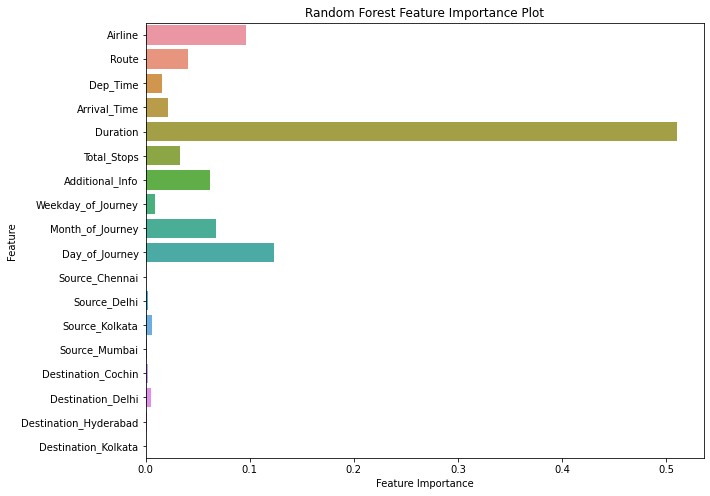

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x= importance, y=columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance Plot")